# 数据预览

## 导入库

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 加载数据
train_df = pd.read_csv('data/train.csv')
print("训练集数据形状:", train_df.shape)

训练集数据形状: (1460, 81)


In [4]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
# 共有 79 个特征列。模型需要使用这些特征来预测由 SalePrice 列指示的房屋售价。
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 房价分布

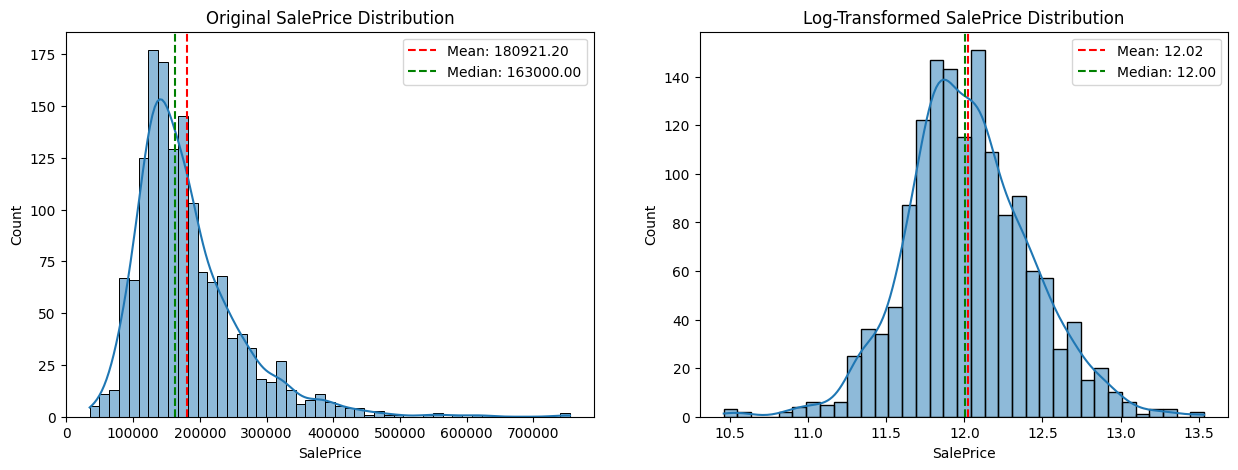

In [12]:
# 单变量分析 - 目标变量
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 原始分布
sns.histplot(train_df['SalePrice'], kde=True, ax=axes[0])
axes[0].set_title('Original SalePrice Distribution')
axes[0].axvline(train_df['SalePrice'].mean(), color='r', linestyle='--', label=f'Mean: {train_df["SalePrice"].mean():.2f}')
axes[0].axvline(train_df['SalePrice'].median(), color='g', linestyle='--', label=f'Median: {train_df["SalePrice"].median():.2f}')
axes[0].legend()

# 对数变换后的分布
log_sale_price = np.log1p(train_df['SalePrice'])
sns.histplot(log_sale_price, kde=True, ax=axes[1])
axes[1].set_title('Log-Transformed SalePrice Distribution')
axes[1].axvline(log_sale_price.mean(), color='r', linestyle='--', label=f'Mean: {log_sale_price.mean():.2f}')
axes[1].axvline(log_sale_price.median(), color='g', linestyle='--', label=f'Median: {log_sale_price.median():.2f}')
axes[1].legend()

plt.show()

## 缺失值分析

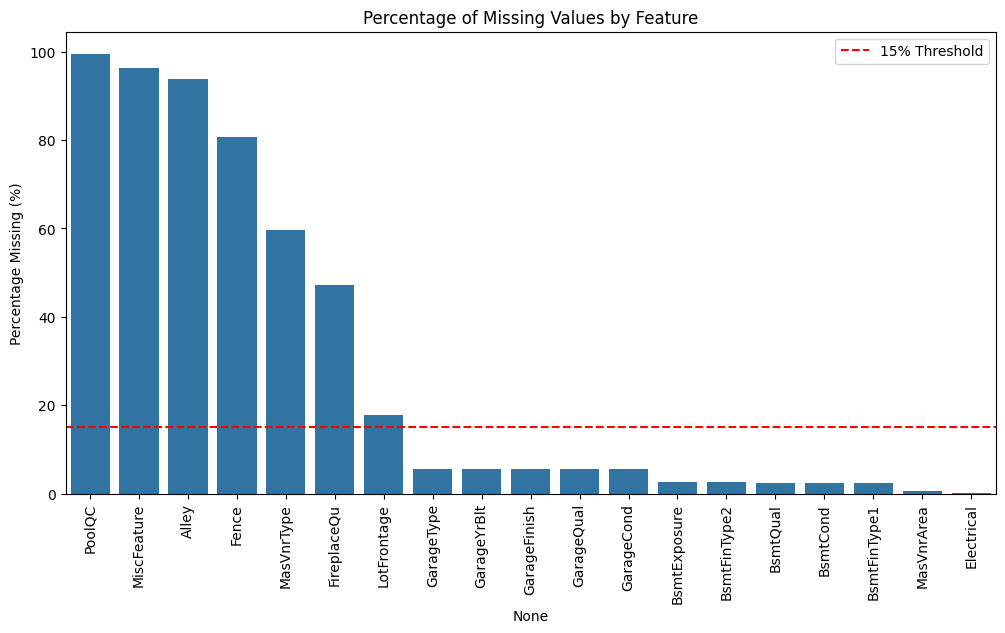

Features with high missing percentage:
PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
MasVnrType     59.726027
FireplaceQu    47.260274
LotFrontage    17.739726
dtype: float64


In [13]:
# 缺失值分析
missing_ratio = train_df.isnull().sum() / len(train_df) * 100
missing_ratio = missing_ratio[missing_ratio > 0].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_ratio.index, y=missing_ratio.values)
plt.xticks(rotation=90)
plt.title('Percentage of Missing Values by Feature')
plt.ylabel('Percentage Missing (%)')
plt.axhline(y=15, color='r', linestyle='--', label='15% Threshold') # 假设我们设定15%为阈值
plt.legend()
plt.show()

# 打印出缺失比例较高的特征
print("Features with high missing percentage:")
print(missing_ratio[missing_ratio > 15])

## 相关性与热力图
计算数值型特征与SalePrice之间的相关性，并用热力图可视化。

Top features correlated with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

 YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


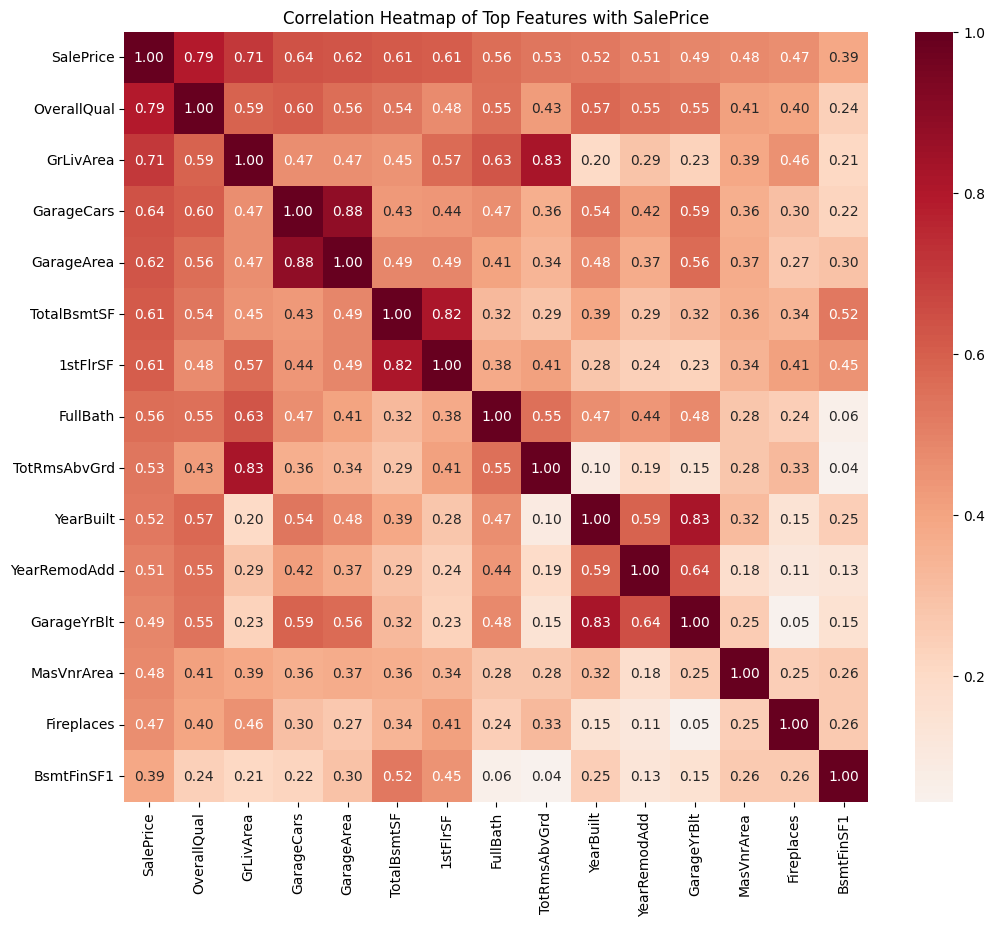

In [14]:
# 相关性与热力图
# 首先，只选择数值型列来计算相关性
numeric_cols = train_df.select_dtypes(include=[np.number]).columns
corr_matrix = train_df[numeric_cols].corr()

# 1. 查看与SalePrice最相关的特征
top_corr_with_target = corr_matrix['SalePrice'].sort_values(ascending=False)
print("Top features correlated with SalePrice:")
print(top_corr_with_target.head(10)) # 看正相关最强的10个
print("\n", top_corr_with_target.tail(5)) # 看负相关最强的5个

# 2. 绘制热力图 (通常我们只关注最相关的那部分，否则图太密)
# 选取与SalePrice相关性最高的15个特征名
top_features = top_corr_with_target.head(15).index
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix.loc[top_features, top_features], annot=True, cmap='RdBu_r', center=0, fmt='.2f')
plt.title('Correlation Heatmap of Top Features with SalePrice')
plt.show()